## Analysis with AQ Score
- AQ Score X OPI (pearson correlation and plot)
- AQ Score X TWI (pearson correlation and plot)
- AQ Score X HL (pearson correlation and plot)
- AQ Score X LDL (pearson correlation and plot)
- TWI - group difference according to matching autism questionnaire criteria for autism evaluation and not (t test and plot)
- OPI -  group difference according to matching autism questionnaire criteria for autism evaluation and not  (t test and plot)
- LDL - group difference according to matching autism questionnaire criteria for autism evaluation and not  (t test and plot)
- HL - group difference according to matching autism questionnaire criteria for autism evaluation and not  (t test and plot)

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pingouin as pg

from functions import sig, alter_sig, sigfit, alter_sigfit

pd.options.mode.chained_assignment = None  # Stop seeing warnings

df = pd.read_pickle("data/df")

In [2]:
df.groupby("AQ_MC").describe()

Age                                                    AQ_TOTAL  \
      count       mean       std   min   25%   50%   75%   max    count   
AQ_MC                                                                     
False  19.0  17.736842  1.194529  16.0  17.0  18.0  18.0  21.0     19.0   
True   11.0  17.272727  1.009050  16.0  16.5  17.0  18.0  19.0     11.0   

                 ...  Avg_HL_R            Avg_HL                      \
           mean  ...       75%        max  count      mean       std   
AQ_MC            ...                                                   
False  3.684211  ...  8.333333  18.333333   16.0  4.895833  5.915102   
True   6.454545  ...  9.375000  11.666667    8.0  5.937500  3.405105   

                                                          
            min       25%       50%       75%        max  
AQ_MC                                                     
False -1.666667 -0.208333  4.583333  8.333333  18.333333  
True   0.000000  3.958333  6.250000  8.541667  10.000000  

[2 rows x 256 columns]

In [3]:
df.groupby(["AQ_MC", "Sex"]).count()

Código de participante  Group  Age  EL  Occupation  \
AQ_MC Sex                                                             
False Femenino                       15     15   15  15          15   
      Masculino                       4      4    4   4           4   
True  Femenino                        9      9    9   9           9   
      Masculino                       2      2    2   2           2   

                 Scholarship  Neurological_D  Conditions  Prob_Vision  \
AQ_MC Sex                                                               
False Femenino            10              15          15           15   
      Masculino            0               4           4            4   
True  Femenino             3               9           9            9   
      Masculino            1               2           2            2   

                 Prob_Aud  ...  HL_250  HL_500  HL_1000  HL_2000  HL_4000  \
AQ_MC Sex                  ...                                              
False Femenino         15  ...      12      12       12       12       12   
      Masculino         4  ...       4       4        4        4        4   
True  Femenino          9  ...       7       7        7        7        7   
      Masculino         2  ...       1       1        1        1        1   

                 HL_8000  Avg_LDL  Avg_HL_L  Avg_HL_R  Avg_HL  
AQ_MC Sex                                                      
False Femenino        12       12        12        12      12  
      Masculino        4        4         4         4       4  
True  Femenino         7        7         7         7       7  
      Masculino        1        1         1         1       1  

[4 rows x 47 columns]

### AQ X OPI, AQ X TWI

In [47]:
pg.pairwise_corr(data=df, columns=[["AQ_TOTAL"], ["TWI", "OPI"]], method="pearson")

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,AQ_TOTAL,TWI,pearson,two-sided,24,0.013932,"[-0.39, 0.41]",0.948483,0.254,0.049854
1,AQ_TOTAL,OPI,pearson,two-sided,26,-0.344960,"[-0.65, 0.05]",0.084369,1.0,0.418183


In [48]:
pg.normality(df[["TWI", "OPI", "AQ_TOTAL"]])

,W,pval,normal
TWI,0.954791,0.342898,True
OPI,0.966593,0.537351,True
AQ_TOTAL,0.957307,0.263953,True


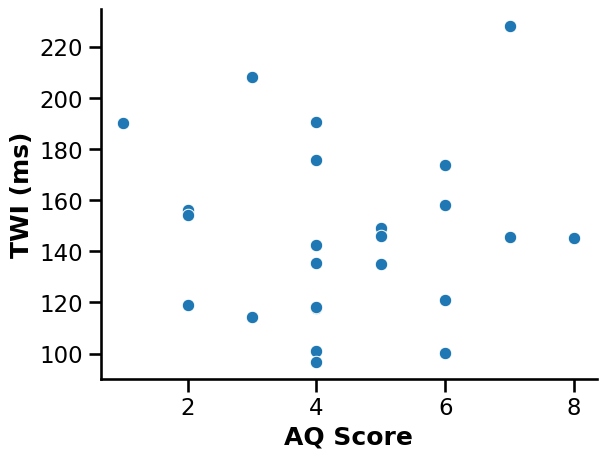

In [5]:
sns.set_context("talk")
sns.axes_style({"font.sans-serif": "Computer Modern Sans Serif"})

fig = sns.scatterplot(data=df, x="AQ_TOTAL", y="TWI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("TWI (ms)", fontdict={"weight": "bold"})  # TODO qué unidad es esta?
fig.set_xlabel("AQ Score", fontdict={"weight": "bold"})

plt.show()

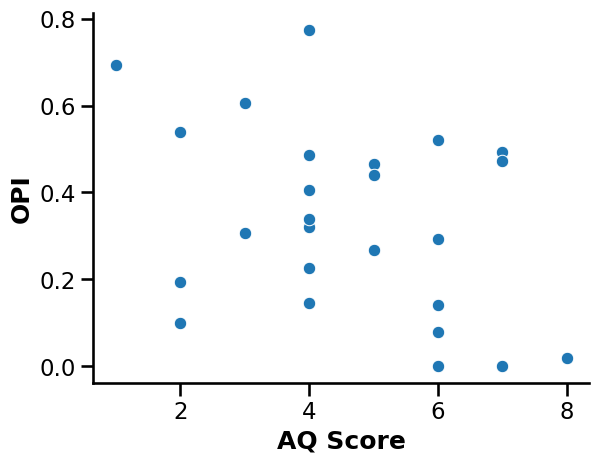

In [6]:
sns.set_context("talk")
fig = sns.scatterplot(data=df, x="AQ_TOTAL", y="OPI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_ylabel("OPI", fontdict={"weight": "bold"})  # TODO qué unidad es esta?
fig.set_xlabel("AQ Score", fontdict={"weight": "bold"})
plt.show()

In [ ]:
## TODO Create plot with this two graphs.

### AQ X LDL

In [49]:
pg.normality(
    df[
        [
            "AQ_TOTAL",
            "Avg_LDL",
            "LDL_250",
            "LDL_500",
            "LDL_1000",
            "LDL_2000",
            "LDL_4000",
            "LDL_8000",
        ]
    ]
)

,W,pval,normal
AQ_TOTAL,0.957307,0.263953,True
Avg_LDL,0.902327,0.024120,False
LDL_250,0.936714,0.137766,True
LDL_500,0.904978,0.027483,False
LDL_1000,0.976486,0.823374,True
LDL_2000,0.929095,0.093053,True
LDL_4000,0.926578,0.081762,True
LDL_8000,0.861714,0.003635,False


In [50]:
pg.pairwise_corr(
    data=df,
    columns=[
        ["AQ_TOTAL"],
        [
            "Avg_LDL",
            "LDL_250",
            "LDL_500",
            "LDL_1000",
            "LDL_2000",
            "LDL_4000",
            "LDL_8000",
        ],
    ],
    method="kendall",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,AQ_TOTAL,Avg_LDL,kendall,two-sided,24,0.418623,"[0.02, 0.7]",0.006916,0.547881
1,AQ_TOTAL,LDL_250,kendall,two-sided,24,0.364565,"[-0.05, 0.67]",0.022917,0.429498
2,AQ_TOTAL,LDL_500,kendall,two-sided,24,0.431540,"[0.03, 0.71]",0.006859,0.576846
3,AQ_TOTAL,LDL_1000,kendall,two-sided,24,0.493011,"[0.11, 0.75]",0.001680,0.711738
4,AQ_TOTAL,LDL_2000,kendall,two-sided,24,0.482282,"[0.1, 0.74]",0.002015,0.688959
5,AQ_TOTAL,LDL_4000,kendall,two-sided,24,0.405798,"[0.0, 0.7]",0.009273,0.519243
6,AQ_TOTAL,LDL_8000,kendall,two-sided,24,0.421637,"[0.02, 0.71]",0.007680,0.554635


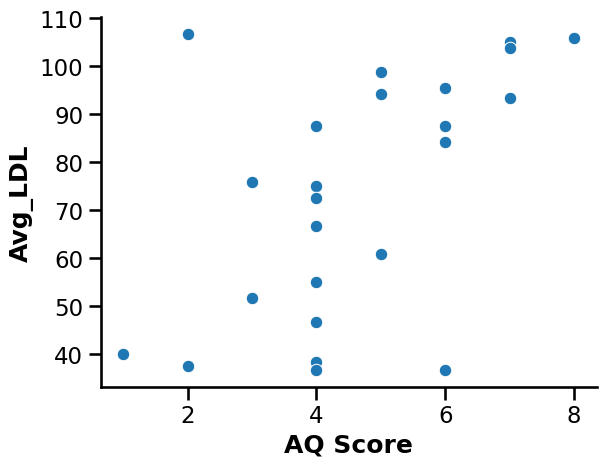

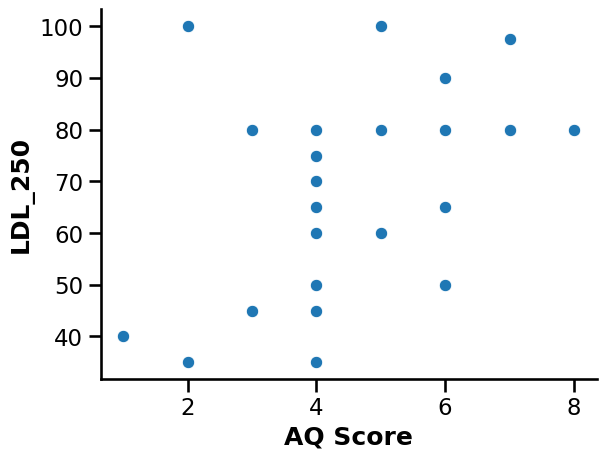

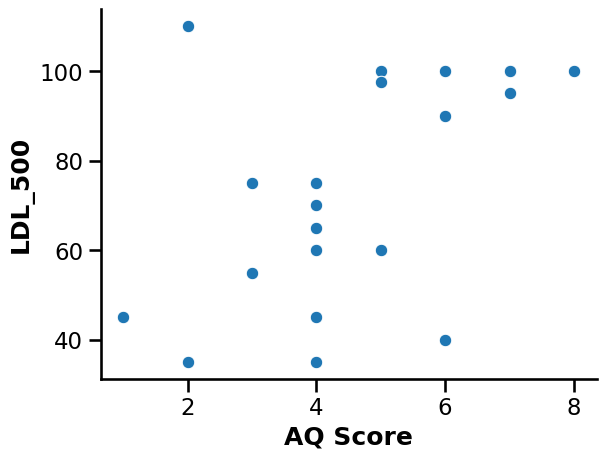

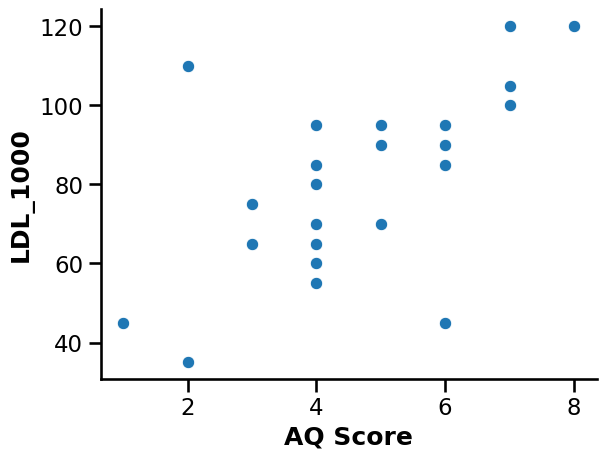

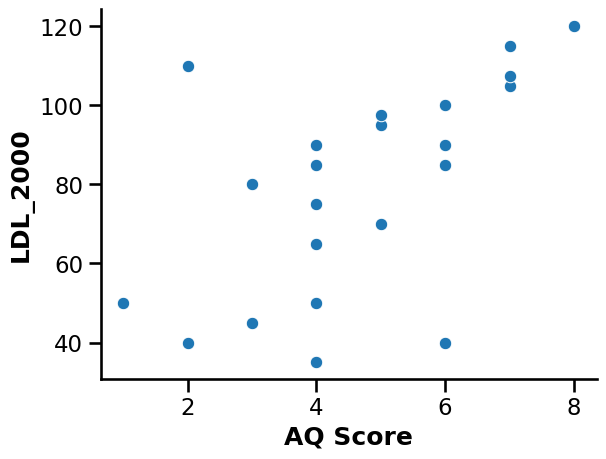

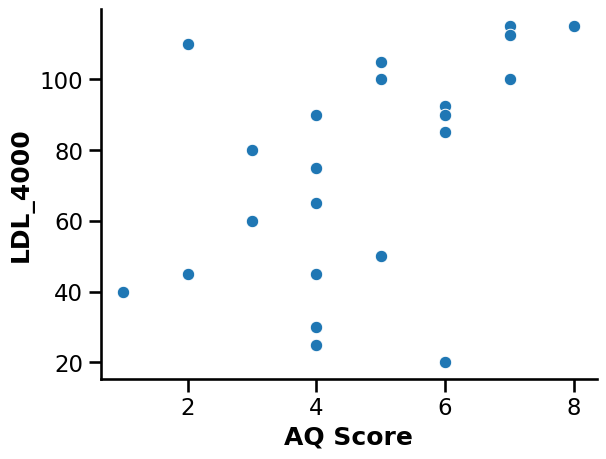

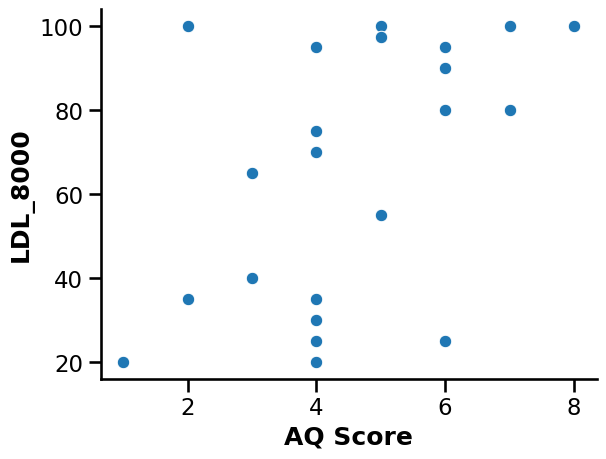

In [51]:
freqs = [
    "Avg_LDL",
    "LDL_250",
    "LDL_500",
    "LDL_1000",
    "LDL_2000",
    "LDL_4000",
    "LDL_8000",
]

for frequency in freqs:
    sns.set_context("talk")
    fig = sns.scatterplot(data=df, x="AQ_TOTAL", y=frequency)
    fig.spines["top"].set_visible(False)
    fig.spines["right"].set_visible(False)
    fig.set_ylabel(frequency, fontdict={"weight": "bold"})  # TODO qué unidad es esta?
    fig.set_xlabel("AQ Score", fontdict={"weight": "bold"})
    plt.show()

In [ ]:
## TODO Create plot with all these graphs

### AQ X HL

In [52]:
pg.normality(
    df[
        [
            "AQ_TOTAL",
            "Avg_HL",
            "HL_250",
            "HL_500",
            "HL_1000",
            "HL_2000",
            "HL_4000",
            "HL_8000",
        ]
    ]
)

,W,pval,normal
AQ_TOTAL,0.957307,0.263953,True
Avg_HL,0.945024,0.210872,True
HL_250,0.907258,0.030768,False
HL_500,0.926514,0.081491,True
HL_1000,0.902279,0.024063,False
HL_2000,0.913749,0.042565,False
HL_4000,0.902583,0.024425,False
HL_8000,0.925178,0.076094,True


In [53]:
pg.pairwise_corr(
    data=df,
    columns=[
        ["AQ_TOTAL"],
        ["Avg_HL", "HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
    ],
    method="kendall",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,AQ_TOTAL,Avg_HL,kendall,two-sided,24,0.136536,"[-0.28, 0.51]",0.384937,0.097603
1,AQ_TOTAL,HL_250,kendall,two-sided,24,0.175933,"[-0.24, 0.54]",0.296498,0.131149
2,AQ_TOTAL,HL_500,kendall,two-sided,24,0.223762,"[-0.2, 0.58]",0.179640,0.185269
3,AQ_TOTAL,HL_1000,kendall,two-sided,24,0.105538,"[-0.31, 0.49]",0.527245,0.077779
4,AQ_TOTAL,HL_2000,kendall,two-sided,24,0.246552,"[-0.17, 0.59]",0.146759,0.216414
5,AQ_TOTAL,HL_4000,kendall,two-sided,24,0.089795,"[-0.33, 0.48]",0.594234,0.069809
6,AQ_TOTAL,HL_8000,kendall,two-sided,24,-0.124734,"[-0.5, 0.29]",0.449061,0.089395


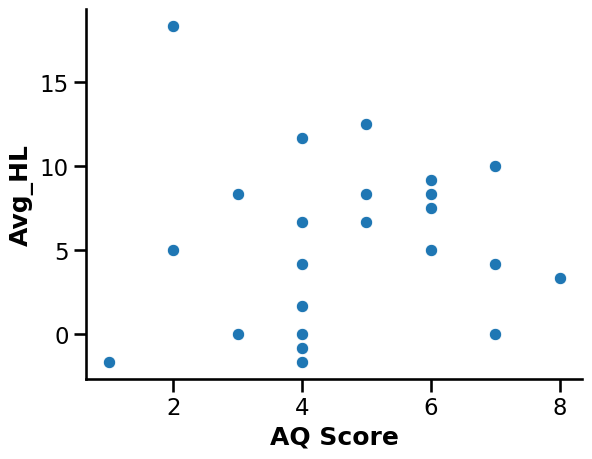

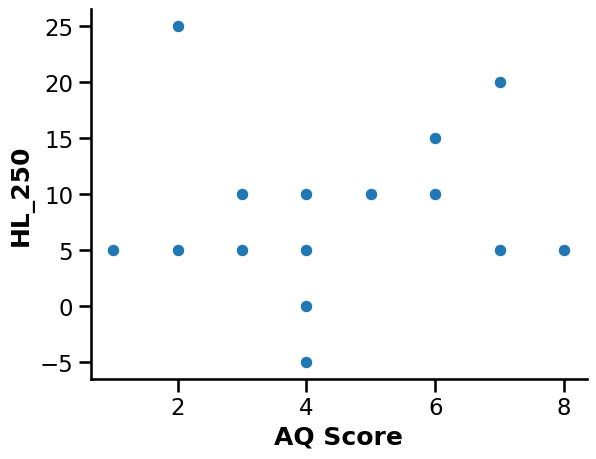

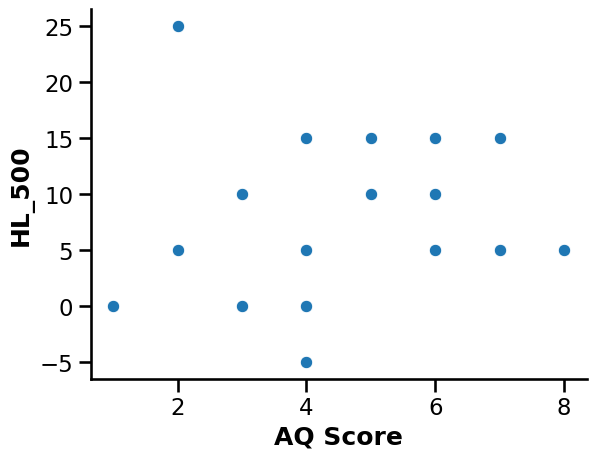

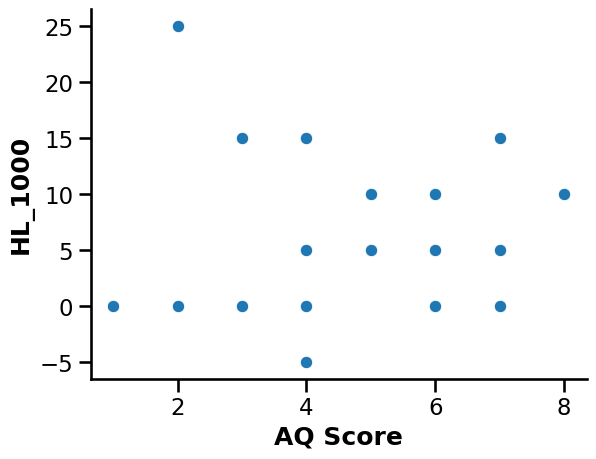

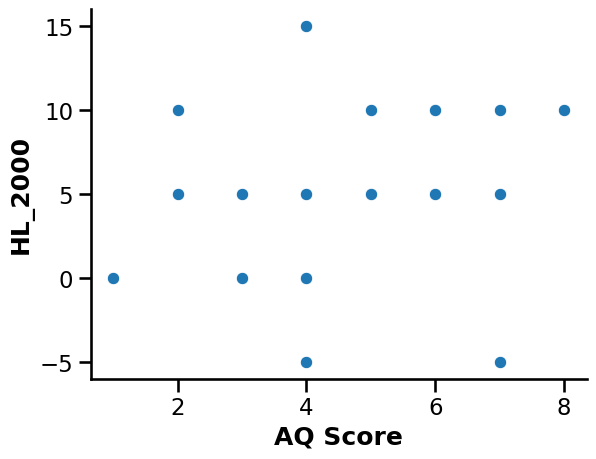

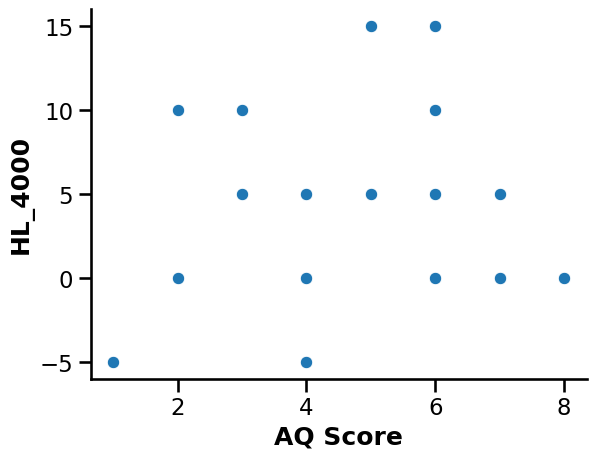

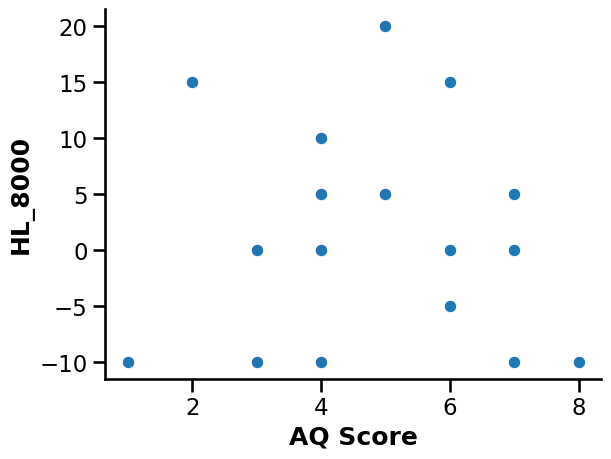

In [10]:
freqs = ["Avg_HL", "HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"]

for frequency in freqs:
    sns.set_context("talk")
    fig = sns.scatterplot(data=df, x="AQ_TOTAL", y=frequency)
    fig.spines["top"].set_visible(False)
    fig.spines["right"].set_visible(False)
    fig.set_ylabel(frequency, fontdict={"weight": "bold"})  # TODO qué unidad es esta?
    fig.set_xlabel("AQ Score", fontdict={"weight": "bold"})
    plt.show()

### Group differences (autism criteria vs no autism criteria) and TWI and OPI

In [56]:
pg.normality(data=df, dv="OPI", group="AQ_MC")

,W,pval,normal
AQ_MC,,,
False,0.962240,0.673904,True
True,0.836546,0.052858,True


In [60]:
pg.pairwise_tests(
    data=df,
    dv="OPI",
    between="AQ_MC",
    effsize="cohen",
    correction=True,
    parametric=True,
    alternative="greater",
)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,1.761365,14.746811,greater,0.049445,2.236,0.754917


/tmp/ipykernel_25677/1083867864.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


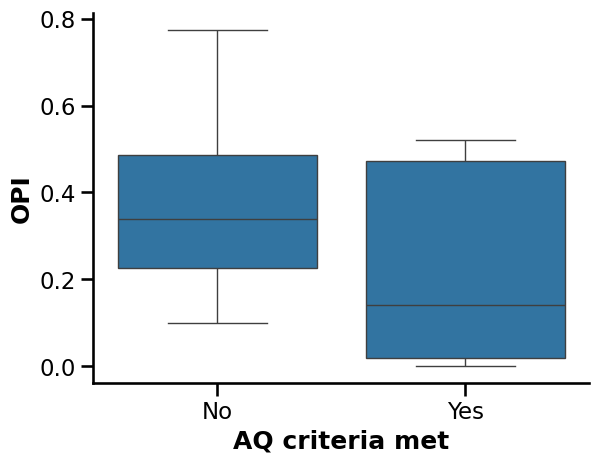

In [61]:
sns.set_context("talk")
fig = sns.boxplot(data=df, x="AQ_MC", y="OPI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel("OPI", fontdict={"weight": "bold"})
fig.set_xlabel("AQ criteria met", fontdict={"weight": "bold"})

plt.show()

In [62]:
pg.normality(data=df, dv="TWI", group="AQ_MC")

,W,pval,normal
AQ_MC,,,
False,0.952980,0.505323,True
True,0.948425,0.715342,True


In [64]:
pg.pairwise_tests(
    data=df,
    dv="TWI",
    between="AQ_MC",
    effsize="cohen",
    correction=True,
    parametric=True,
)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-0.522595,9.29704,two-sided,0.61348,0.439,-0.259044


/tmp/ipykernel_25677/3320831477.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


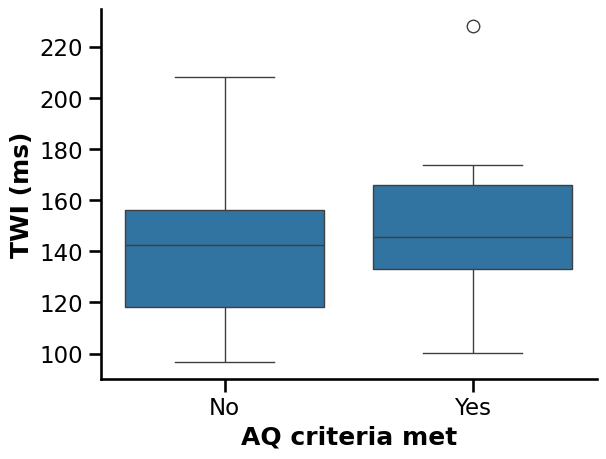

In [65]:
sns.set_context("talk")
fig = sns.boxplot(data=df, x="AQ_MC", y="TWI")
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel("TWI (ms)", fontdict={"weight": "bold"})
fig.set_xlabel("AQ criteria met", fontdict={"weight": "bold"})

plt.show()

### Group differences (autism criteria vs no autism criteria) and HL mean and LDL mean per frequency

#### LDL

In [130]:
df_pointplots = df[
    [
        "Código de participante",
        "AQ_MC",
        "LDL_250",
        "LDL_500",
        "LDL_1000",
        "LDL_2000",
        "LDL_4000",
        "LDL_8000",
        "LDL_Ear",
        "HL_250_R",
        "HL_500_R",
        "HL_1000_R",
        "HL_2000_R",
        "HL_4000_R",
        "HL_8000_R",
        "HL_250_L",
        "HL_500_L",
        "HL_1000_L",
        "HL_2000_L",
        "HL_4000_L",
        "HL_8000_L",
        "HL_250",
        "HL_500",
        "HL_1000",
        "HL_2000",
        "HL_4000",
        "HL_8000",
    ]
]

# Split groups
df_pointplots_AQ = df_pointplots[df_pointplots["AQ_MC"] == True]
df_pointplots_control = df_pointplots[df_pointplots["AQ_MC"] == False]

# Melt for HA
df_pointplots_AQ = pd.melt(
    df_pointplots_AQ,
    id_vars=["Código de participante"],
    value_vars=["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"],
)
df_pointplots_AQ["Group"] = "AQ"

# Melt for control
df_pointplots_control = pd.melt(
    df_pointplots_control,
    id_vars=["Código de participante"],
    value_vars=["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"],
)
df_pointplots_control["Group"] = "Control"

# Concat
df_pointplots_ldl = pd.concat([df_pointplots_AQ, df_pointplots_control])

# Rename columns
df_pointplots_ldl.dropna(inplace=True)
df_pointplots_ldl.columns = ["ID", "Freq", "Db", "Group"]

df_pointplots_ldl

,ID,Freq,Db,Group
0,AC02,LDL_250,80.0,AQ
1,AC05,LDL_250,80.0,AQ
2,AC06,LDL_250,80.0,AQ
3,AC10,LDL_250,90.0,AQ
4,AC11,LDL_250,65.0,AQ
...,...,...,...,...
109,GC001,LDL_8000,20.0,Control
110,GC006,LDL_8000,35.0,Control
111,GC007,LDL_8000,75.0,Control
112,GC008,LDL_8000,20.0,Control


/tmp/ipykernel_25677/2399635699.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


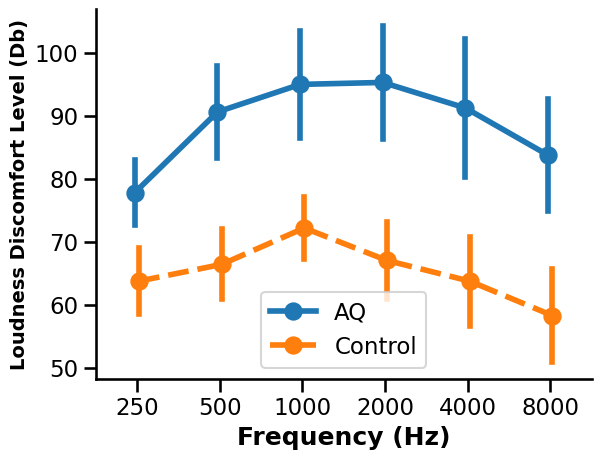

In [129]:
fig = sns.pointplot(
    data=df_pointplots_ldl,
    x="Freq",
    y="Db",
    hue="Group",
    linestyles=["-", "--"],
    errorbar="se",
    dodge=True,
)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
fig.set_ylabel(
    "Loudness Discomfort Level (Db)", fontdict={"weight": "bold", "size": 14}
)  # TODO qué unidad es esta?
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})

# Remove legend title
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

In [132]:
pg.normality(data=df_pointplots_ldl, dv="Db", group="Freq")

,W,pval,normal
Freq,,,
LDL_250,0.936714,0.137766,True
LDL_500,0.904978,0.027483,False
LDL_1000,0.976486,0.823374,True
LDL_2000,0.929095,0.093053,True
LDL_4000,0.926578,0.081762,True
LDL_8000,0.861714,0.003635,False


In [137]:
pg.mixed_anova(
    data=df_pointplots_ldl, dv="Db", between="Group", within="Freq", subject="ID"
)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Group,18010.438368,1,22,18010.438368,5.685472,0.026157,NaN,0.205359,NaN,NaN,NaN,NaN
1,Freq,2874.696181,5,110,574.939236,7.494637,0.000004,0.000241,0.254102,0.61345,False,0.23805,0.007279
2,Interaction,706.618924,5,110,141.323785,1.842230,0.110471,NaN,0.077268,NaN,NaN,NaN,NaN


In [146]:
pg.pairwise_tests(
    data=df_pointplots_ldl,
    dv="Db",
    between="Group",
    within="Freq",
    subject="ID",
    correction=True,
    effsize="cohen",
)

,Contrast,Freq,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,Freq,-,LDL_1000,LDL_2000,True,True,1.591717,23.000000,two-sided,0.125100,0.646,0.130232
1,Freq,-,LDL_1000,LDL_250,True,True,4.485311,23.000000,two-sided,0.000168,170.173,0.520410
2,Freq,-,LDL_1000,LDL_4000,True,True,2.336757,23.000000,two-sided,0.028525,2.037,0.247802
3,Freq,-,LDL_1000,LDL_500,True,True,2.482002,23.000000,two-sided,0.020803,2.636,0.222819
4,Freq,-,LDL_1000,LDL_8000,True,True,4.065502,23.000000,two-sided,0.000478,67.154,0.480672
5,Freq,-,LDL_2000,LDL_250,True,True,3.003261,23.000000,two-sided,0.006342,7.113,0.332399
6,Freq,-,LDL_2000,LDL_4000,True,True,1.968706,23.000000,two-sided,0.061153,1.111,0.119664
7,Freq,-,LDL_2000,LDL_500,True,True,0.901215,23.000000,two-sided,0.376815,0.309,0.076195
8,Freq,-,LDL_2000,LDL_8000,True,True,4.571421,23.000000,two-sided,0.000135,206.193,0.334240
9,Freq,-,LDL_250,LDL_4000,True,True,-1.310375,23.000000,two-sided,0.203005,0.459,-0.169676


t test for Avg_LDL


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-2.403531,14.404446,two-sided,0.030221,2.655,-1.032485


/tmp/ipykernel_25677/1693551075.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


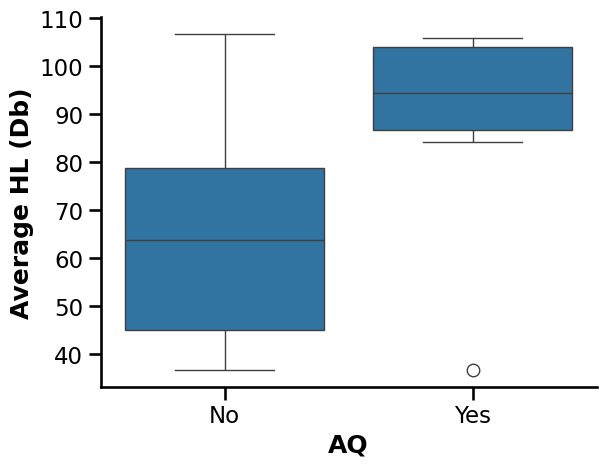

In [169]:
measurement = "Avg_LDL"
print("t test for %s" % (measurement))
display(
    pg.pairwise_tests(
        data=df, dv=measurement, between="AQ_MC", correction=True, effsize="cohen"
    )
)

sns.set_context("talk")
fig = sns.boxplot(data=df, x="AQ_MC", y=measurement)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel(
    "Average HL (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_xlabel("AQ", fontdict={"weight": "bold"})

plt.show()

#### HL

In [161]:
# Split groups
df_pointplots_HA = df_pointplots[df_pointplots["AQ_MC"] == True]
df_pointplots_control = df_pointplots[df_pointplots["AQ_MC"] == False]

# Melt for HA
df_pointplots_HA = pd.melt(
    df_pointplots_HA,
    id_vars=["Código de participante"],
    value_vars=["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
)
df_pointplots_HA["Group"] = "AQ"

# Melt for control
df_pointplots_control = pd.melt(
    df_pointplots_control,
    id_vars=["Código de participante"],
    value_vars=["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
)
df_pointplots_control["Group"] = "Control"

# Concat
df_pointplots_hl = pd.concat([df_pointplots_HA, df_pointplots_control])
df_pointplots_hl.columns = ["ID", "Freq", "Db", "Group"]
df_pointplots_hl.dropna(inplace=True)

df_pointplots_hl

,ID,Freq,Db,Group
0,AC02,HL_250,10.0,AQ
1,AC05,HL_250,5.0,AQ
2,AC06,HL_250,5.0,AQ
3,AC10,HL_250,15.0,AQ
4,AC11,HL_250,10.0,AQ
...,...,...,...,...
109,GC001,HL_8000,-10.0,Control
110,GC006,HL_8000,15.0,Control
111,GC007,HL_8000,0.0,Control
112,GC008,HL_8000,5.0,Control


/tmp/ipykernel_25677/1253760234.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])


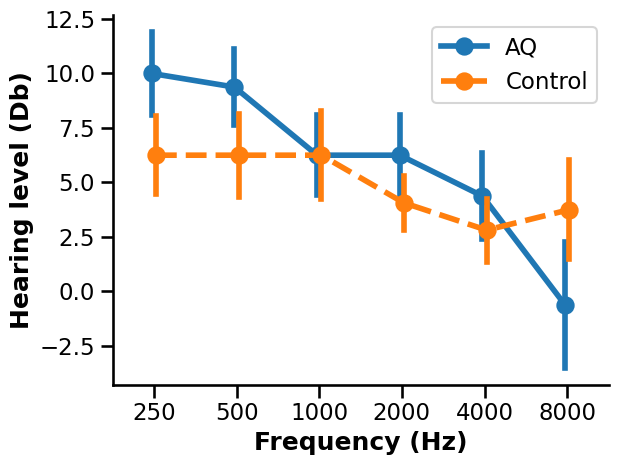

In [162]:
fig = sns.pointplot(
    data=df_pointplots_hl,
    x="Freq",
    y="Db",
    hue="Group",
    linestyles=["-", "--"],
    errorbar="se",
    dodge=True,
)
# plt.title("Hearing Level (Db) per Frequency (Hz)")
fig.set_xticklabels([250, 500, 1000, 2000, 4000, 8000])
# plt.xticks(['HL_250', 'HL_500', 'HL_1000', 'HL_2000', 'HL_4000', 'HL_8000'], [250, 'HL_500', 'HL_1000','HL_2000', 'HL_4000', 'HL_8000'])
fig.set_xlabel("Frequency (Hz)", fontdict={"weight": "bold"})
fig.set_ylabel("Hearing level (Db)", fontdict={"weight": "bold"})
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)

handles, labels = fig.get_legend_handles_labels()
fig.legend(handles=handles[2:], labels=labels[2:])

plt.show()

In [164]:
pg.normality(data=df_pointplots_hl, dv="Db", group="Freq")

,W,pval,normal
Freq,,,
HL_250,0.907258,0.030768,False
HL_500,0.926514,0.081491,True
HL_1000,0.902279,0.024063,False
HL_2000,0.913749,0.042565,False
HL_4000,0.902583,0.024425,False
HL_8000,0.925178,0.076094,True


In [165]:
pg.mixed_anova(
    data=df_pointplots_hl, dv="Db", between="Group", within="Freq", subject="ID"
)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,Group,34.722222,1,22,34.722222,0.210094,0.651189,NaN,0.009459,NaN,NaN,NaN,NaN
1,Freq,548.784722,5,110,109.756944,4.802293,0.000522,0.00431,0.179175,0.646071,False,0.230408,0.00585
2,Interaction,232.986111,5,110,46.597222,2.038809,0.078700,NaN,0.084813,NaN,NaN,NaN,NaN


In [167]:
pg.pairwise_tests(
    data=df_pointplots_hl,
    dv="Db",
    between="Group",
    within="Freq",
    subject="ID",
    correction=True,
    effsize="cohen",
)

,Contrast,Freq,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,Freq,-,HL_1000,HL_2000,True,True,1.070743,23.000000,two-sided,0.295393,0.358,0.237358
1,Freq,-,HL_1000,HL_250,True,True,-1.297277,23.000000,two-sided,0.207398,0.452,-0.180238
2,Freq,-,HL_1000,HL_4000,True,True,2.118971,23.000000,two-sided,0.045105,1.411,0.454324
3,Freq,-,HL_1000,HL_500,True,True,-0.925705,23.000000,two-sided,0.364211,0.316,-0.148564
4,Freq,-,HL_1000,HL_8000,True,True,2.134146,23.000000,two-sided,0.043715,1.446,0.493331
5,Freq,-,HL_2000,HL_250,True,True,-2.183878,23.000000,two-sided,0.039427,1.57,-0.455820
6,Freq,-,HL_2000,HL_4000,True,True,1.319805,23.000000,two-sided,0.199887,0.464,0.273558
7,Freq,-,HL_2000,HL_500,True,True,-2.220039,23.000000,two-sided,0.036552,1.668,-0.414555
8,Freq,-,HL_2000,HL_8000,True,True,1.424574,23.000000,two-sided,0.167709,0.524,0.348079
9,Freq,-,HL_250,HL_4000,True,True,3.293791,23.000000,two-sided,0.003177,12.844,0.669193


t test for Avg_HL


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,AQ_MC,False,True,False,True,-0.546273,21.363221,two-sided,0.590538,0.432,-0.198476


/tmp/ipykernel_25677/3850855842.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(["No", "Yes"])


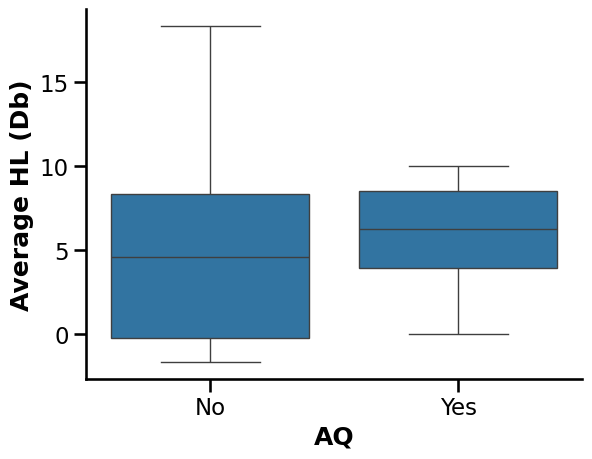

In [19]:
measurement = "Avg_HL"
print("t test for %s" % (measurement))
display(
    pg.pairwise_tests(
        data=df, dv=measurement, between="AQ_MC", correction=True, effsize="cohen"
    )
)

sns.set_context("talk")
fig = sns.boxplot(data=df, x="AQ_MC", y=measurement)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xticklabels(["No", "Yes"])
fig.set_ylabel(
    "Average HL (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_xlabel("AQ", fontdict={"weight": "bold"})

plt.show()

## DFI Plot

### Preprocessing

In [ ]:
df_sigmoid_fitted = pd.read_pickle("data/df_group_sigmoid_aq")

soas = [
    34.0,
    51.0,
    68.0,
    85.0,
    102.0,
    119.0,
    136.0,
    153.0,
    170.0,
    187.0,
    204.0,
    221.0,
    238.0,
    255.0,
    272.0,
]  # inter beep delay in experiment

In [ ]:
df_sigmoid_fitted

,AQ_MC,a,b,TWI,slope,illusion_count
0,False,15.652368,47.333169,145.875356,-19.290868,57.000000
1,True,8.560475,28.027376,151.819128,-15.671691,33.666667


In [ ]:
# Generate the data for the plotsusing the fitted parameters
x = np.linspace(soas[0], soas[-1], 100)

index_of_control_group = 0
control = df_sigmoid_fitted.iloc[index_of_control_group].tolist()[1:-1]

index_of_HA_group = 1
ha = df_sigmoid_fitted.iloc[index_of_HA_group].tolist()[1:-1]

y_control = sig(x, *control)
y_ha = sig(x, *ha)

# Create a pandas DataFrame
df_control = pd.DataFrame({"x": x, "y": y_control})
df_ha = pd.DataFrame({"x": x, "y": y_ha})

### Plot

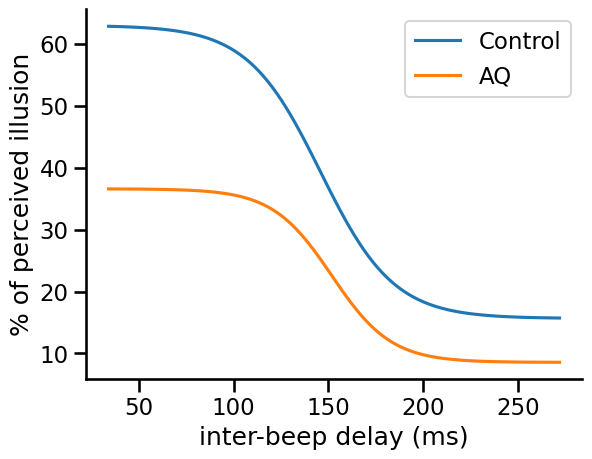

In [ ]:
# Plot the sigmoid function
fig = sns.lineplot(data=df_control, x="x", y="y", label="Control")
fig = sns.lineplot(data=df_ha, x="x", y="y", label="AQ")

plt.xlabel("inter-beep delay (ms)")
plt.ylabel("% of perceived illusion")
plt.legend()
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
plt.show()

## EXTRA
### Correlations between audiometry measurements and double flash illusion
- Average LDL across frequenciess x TWI (plot and correlation)
- Average LDL across frequenciess x OPI (plot and correlation)
- Average HL across frequenciess x TWI (plot and correlation)
- Average HL across frequencies x OPI (plot and correlation)

In [176]:
pg.pairwise_corr(
    data=df, columns=[["TWI", "OPI"], ["Avg_LDL", "Avg_HL"]], method="pearson"
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,TWI,Avg_LDL,pearson,two-sided,20,-0.062900,"[-0.49, 0.39]",0.792207,0.286,0.057361
1,TWI,Avg_HL,pearson,two-sided,20,0.056951,"[-0.4, 0.49]",0.811505,0.284,0.055892
2,OPI,Avg_LDL,pearson,two-sided,22,-0.211959,"[-0.58, 0.23]",0.343658,0.403,0.158997
3,OPI,Avg_HL,pearson,two-sided,22,-0.032746,"[-0.45, 0.39]",0.884974,0.267,0.051750


In [174]:
pg.pairwise_corr(
    data=df,
    columns=[
        ["TWI", "OPI"],
        ["HL_250", "HL_500", "HL_1000", "HL_2000", "HL_4000", "HL_8000"],
    ],
    method="pearson",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,TWI,HL_250,pearson,two-sided,20,0.206910,"[-0.26, 0.59]",0.381424,0.396,0.142610
1,TWI,HL_500,pearson,two-sided,20,0.258397,"[-0.21, 0.63]",0.271336,0.488,0.199184
2,TWI,HL_1000,pearson,two-sided,20,0.238559,"[-0.23, 0.62]",0.311110,0.448,0.175615
3,TWI,HL_2000,pearson,two-sided,20,-0.241555,"[-0.62, 0.23]",0.304889,0.453,0.179031
4,TWI,HL_4000,pearson,two-sided,20,-0.048788,"[-0.48, 0.4]",0.838152,0.282,0.054119
5,TWI,HL_8000,pearson,two-sided,20,-0.141683,"[-0.55, 0.32]",0.551278,0.327,0.091555
6,OPI,HL_250,pearson,two-sided,22,-0.058264,"[-0.47, 0.37]",0.796756,0.273,0.057051
7,OPI,HL_500,pearson,two-sided,22,-0.055703,"[-0.47, 0.37]",0.805521,0.272,0.056382
8,OPI,HL_1000,pearson,two-sided,22,0.060992,"[-0.37, 0.47]",0.787444,0.273,0.057798
9,OPI,HL_2000,pearson,two-sided,22,-0.380919,"[-0.69, 0.05]",0.080289,1.114,0.429532


In [175]:
pg.pairwise_corr(
    data=df,
    columns=[
        ["TWI", "OPI"],
        ["LDL_250", "LDL_500", "LDL_1000", "LDL_2000", "LDL_4000", "LDL_8000"],
    ],
    method="pearson",
)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,TWI,LDL_250,pearson,two-sided,20,-0.223186,"[-0.61, 0.24]",0.344222,0.421,0.158885
1,TWI,LDL_500,pearson,two-sided,20,-0.193785,"[-0.59, 0.27]",0.412996,0.379,0.130543
2,TWI,LDL_1000,pearson,two-sided,20,0.041835,"[-0.41, 0.48]",0.860984,0.281,0.052828
3,TWI,LDL_2000,pearson,two-sided,20,0.004645,"[-0.44, 0.45]",0.984494,0.277,0.049303
4,TWI,LDL_4000,pearson,two-sided,20,0.017539,"[-0.43, 0.46]",0.941493,0.277,0.049885
5,TWI,LDL_8000,pearson,two-sided,20,-0.071683,"[-0.5, 0.38]",0.763932,0.289,0.059805
6,OPI,LDL_250,pearson,two-sided,22,-0.268850,"[-0.62, 0.17]",0.226340,0.526,0.231410
7,OPI,LDL_500,pearson,two-sided,22,-0.210887,"[-0.58, 0.23]",0.346159,0.401,0.157825
8,OPI,LDL_1000,pearson,two-sided,22,-0.131458,"[-0.52, 0.31]",0.559800,0.31,0.089733
9,OPI,LDL_2000,pearson,two-sided,22,-0.190317,"[-0.57, 0.25]",0.396241,0.371,0.136668


,n,r,CI95%,p-val,BF10,power
pearson,20,-0.0629,"[-0.49, 0.39]",0.792207,0.286,0.057361


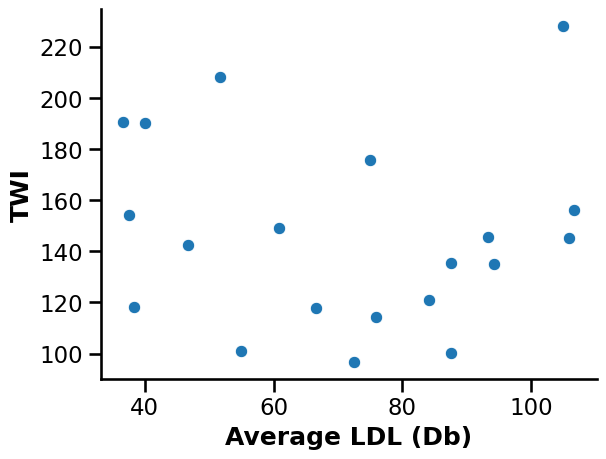

In [171]:
x = "Avg_LDL"
y = "TWI"

display(pg.corr(df[x], df[y]))

sns.set_context("talk")
fig = sns.scatterplot(data=df, x=x, y=y)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xlabel(
    "Average LDL (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_ylabel("TWI", fontdict={"weight": "bold"})
plt.show()

,n,r,CI95%,p-val,BF10,power
pearson,22,-0.211959,"[-0.58, 0.23]",0.343658,0.403,0.158997


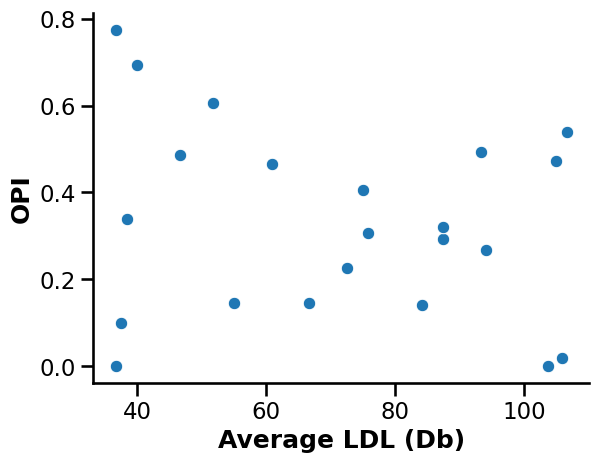

In [22]:
x = "Avg_LDL"
y = "OPI"

display(pg.corr(df[x], df[y]))

sns.set_context("talk")
fig = sns.scatterplot(data=df, x=x, y=y)
fig.spines["top"].set_visible(False)
fig.spines["right"].set_visible(False)
fig.set_xlabel(
    "Average LDL (Db)", fontdict={"weight": "bold"}
)  # TODO qué unidad es esta?
fig.set_ylabel("OPI", fontdict={"weight": "bold"})
plt.show()